<a href="https://colab.research.google.com/github/SheikhNazmul/ML-project-for-Heart-Failure-Prediction-Data/blob/main/Model_train_Heart_deasis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")
sns.set(font_scale=1.1)

from google.colab import files

In [ ]:
uploaded = files.upload()
df = pd.read_csv("heart.csv")

df.head(10)

Saving heart.csv to heart.csv


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [ ]:
#basic info
print('shape:',df.shape)

shape: (918, 12)


In [ ]:
print('info:',df.info)
df.info()

info: <bound method DataFrame.info of      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  Hear

In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [ ]:
from pandas.core.arrays import categorical
terget_col = "HeartDisease"

numeric_cols = ['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak']

categorical_cols =['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']

print(terget_col)
print(numeric_cols)
print(categorical_cols)

HeartDisease
['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [ ]:
df.isna().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [ ]:
df[numeric_cols].agg(['min','max','mean','median']).T

,min,max,mean,median
Age,28.0,77.0,53.510893,54.0
RestingBP,0.0,200.0,132.396514,130.0
Cholesterol,0.0,603.0,198.799564,223.0
FastingBS,0.0,1.0,0.233115,0.0
MaxHR,60.0,202.0,136.809368,138.0
Oldpeak,-2.6,6.2,0.887364,0.6


In [ ]:
for c in categorical_cols:
    print(c, df[c].unique())

    #M,F, female, male,'F'

Sex ['M' 'F']
ChestPainType ['ATA' 'NAP' 'ASY' 'TA']
RestingECG ['Normal' 'ST' 'LVH']
ExerciseAngina ['N' 'Y']
ST_Slope ['Up' 'Flat' 'Down']


Text(49.375, 0.5, 'Frequency')

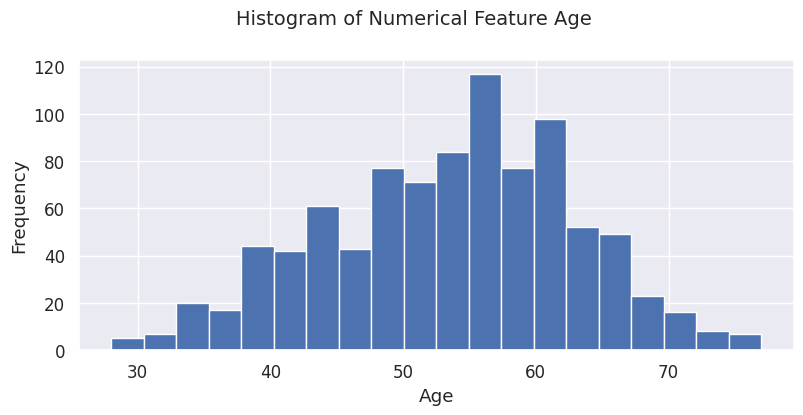

In [ ]:
df['Age'].hist(bins=20,figsize=(8,4))

plt.suptitle('Histogram of Numerical Feature Age',fontsize =14)
plt.tight_layout()
plt.xlabel('Age')
plt.ylabel('Frequency')

Text(49.375, 0.5, 'Frequency')

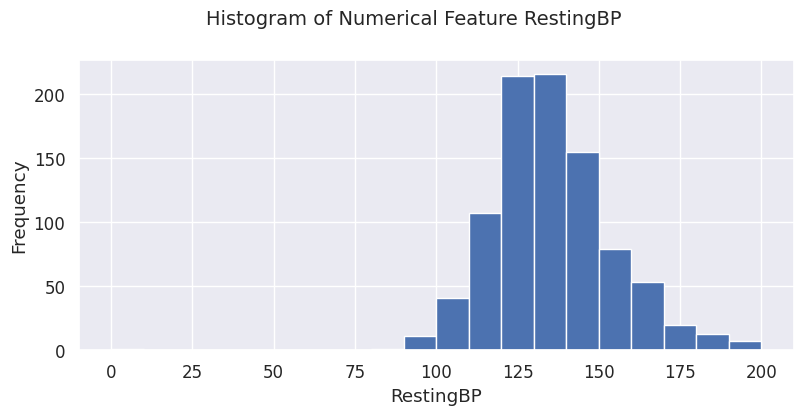

In [ ]:

df['RestingBP'].hist(bins=20,figsize=(8,4))

plt.suptitle('Histogram of Numerical Feature RestingBP',fontsize =14)
plt.tight_layout()
plt.xlabel('RestingBP')
plt.ylabel('Frequency')


Text(49.375, 0.5, 'Frequency')

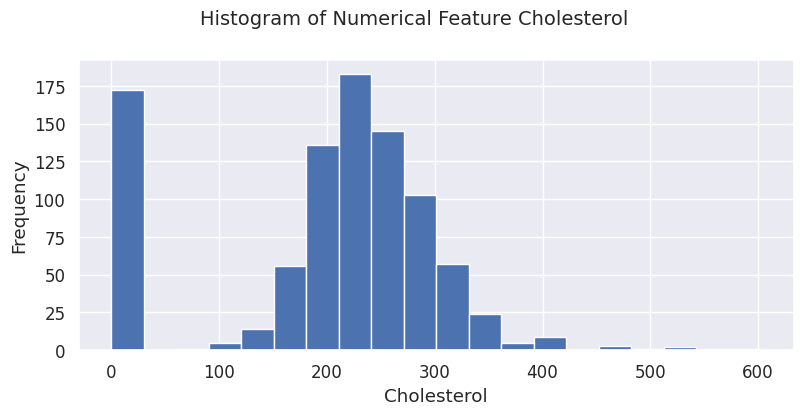

In [ ]:

df['Cholesterol'].hist(bins=20,figsize=(8,4))

plt.suptitle('Histogram of Numerical Feature Cholesterol',fontsize =14)
plt.tight_layout()
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')

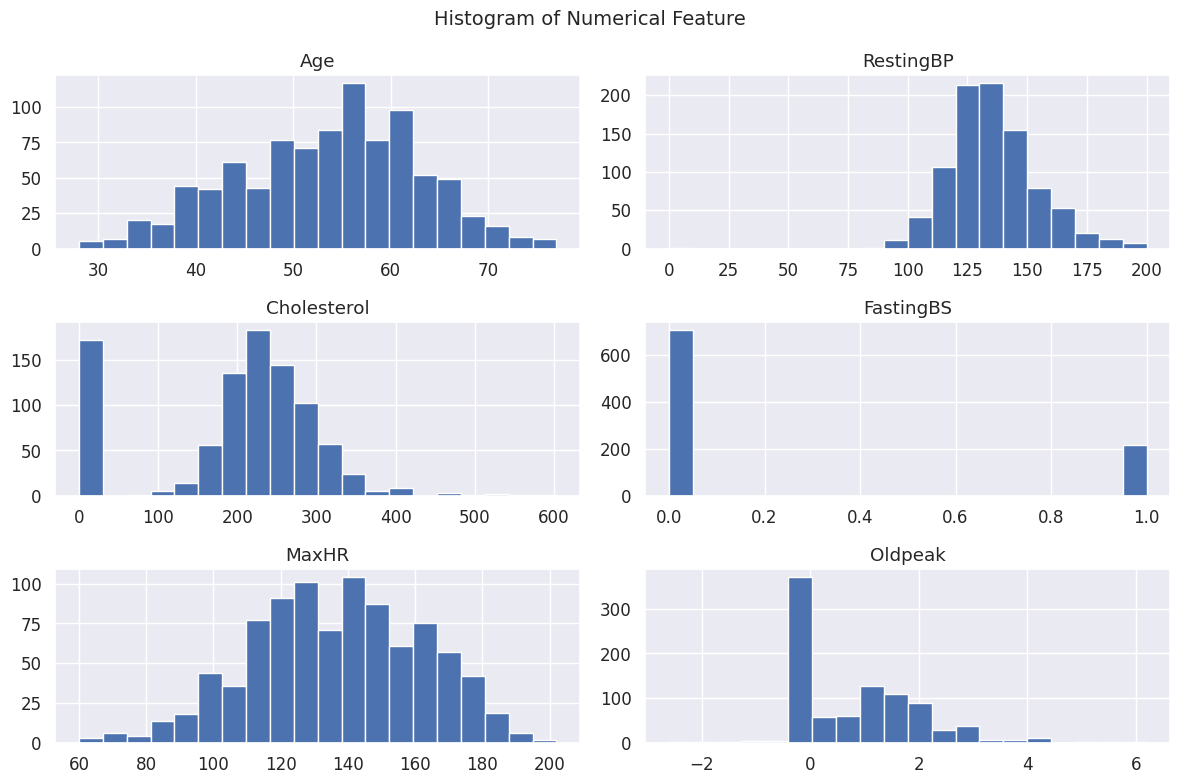

In [ ]:
df[numeric_cols].hist(bins=20,figsize=(12,8))

plt.suptitle('Histogram of Numerical Feature',fontsize =14)
plt.tight_layout()
plt.show()

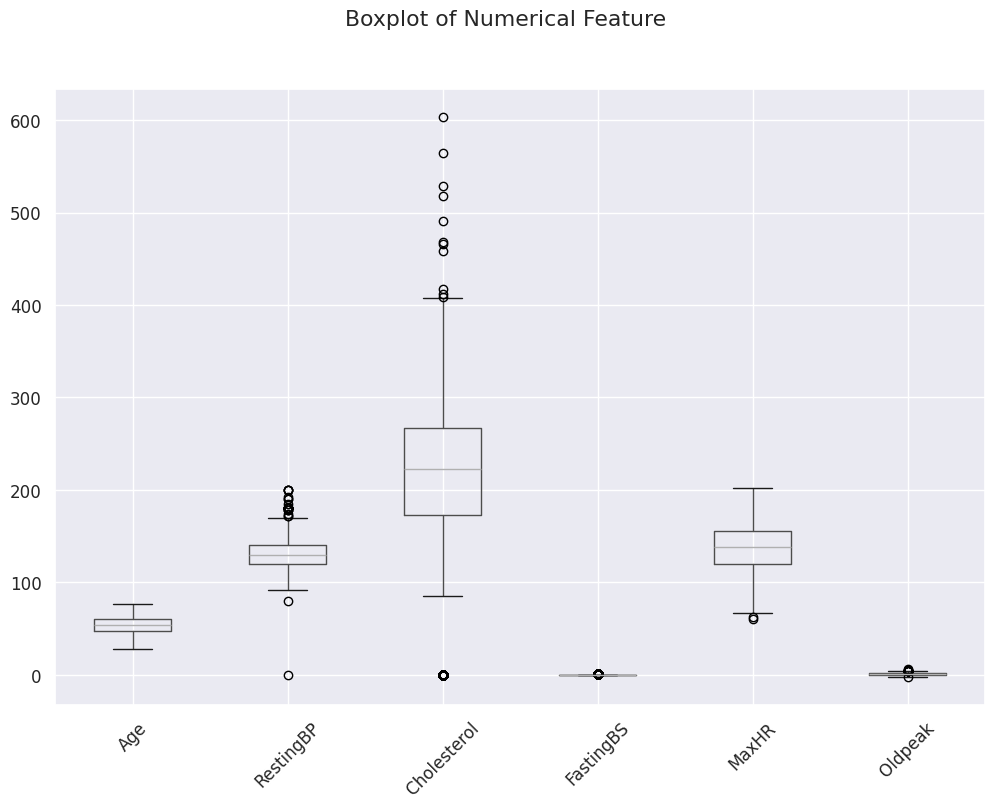

In [ ]:

plt.figure(figsize=(12,8))
df[numeric_cols].boxplot()
plt.suptitle('Boxplot of Numerical Feature')
plt.xticks(rotation=45)
plt.show()

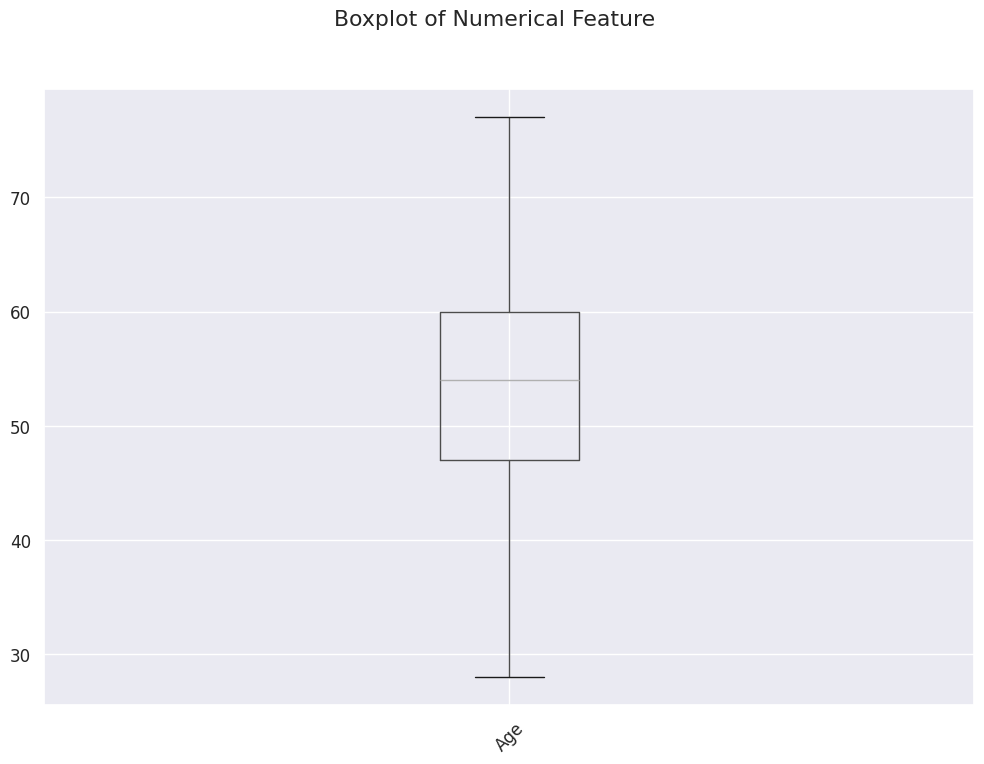

In [ ]:
plt.figure(figsize=(12,8))
df.boxplot(column=numeric_cols[0])
plt.suptitle('Boxplot of Numerical Feature')
plt.xticks(rotation=45)
plt.show()

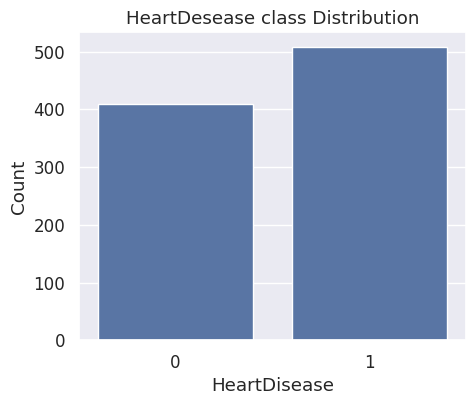

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(x=df[terget_col])
plt.title('HeartDesease class Distribution')
plt.xlabel('HeartDisease')
plt.ylabel('Count')

plt.show()


In [ ]:
df[terget_col].value_counts(normalize=True)

,proportion
HeartDisease,
1,0.553377
0,0.446623


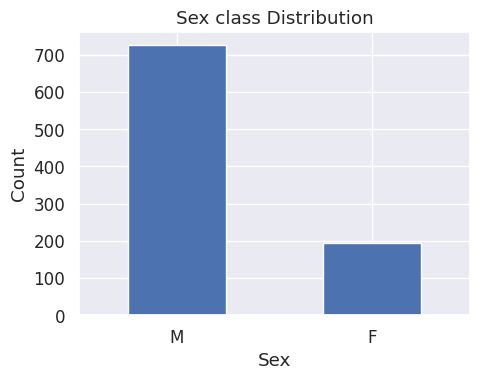

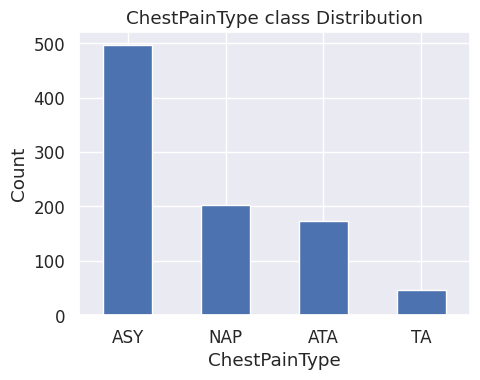

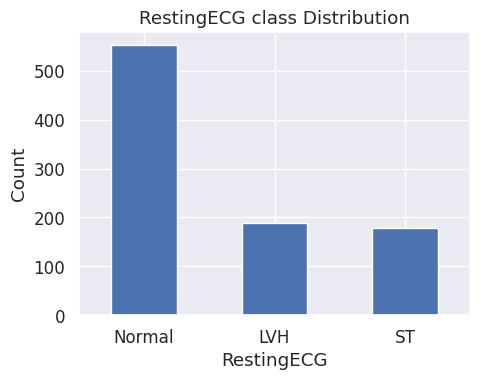

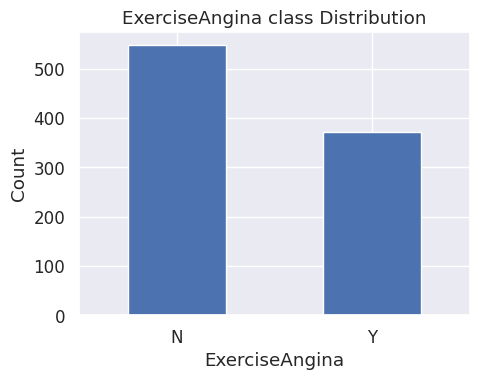

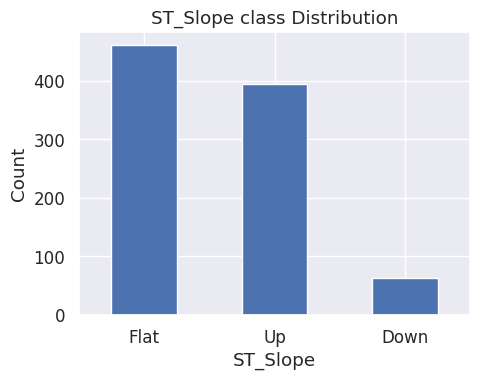

In [ ]:
for c in categorical_cols:
    plt.figure(figsize=(5,4))
    df[c].value_counts().plot(kind='bar')
    plt.title(f'{c} class Distribution')
    plt.xlabel(c)
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

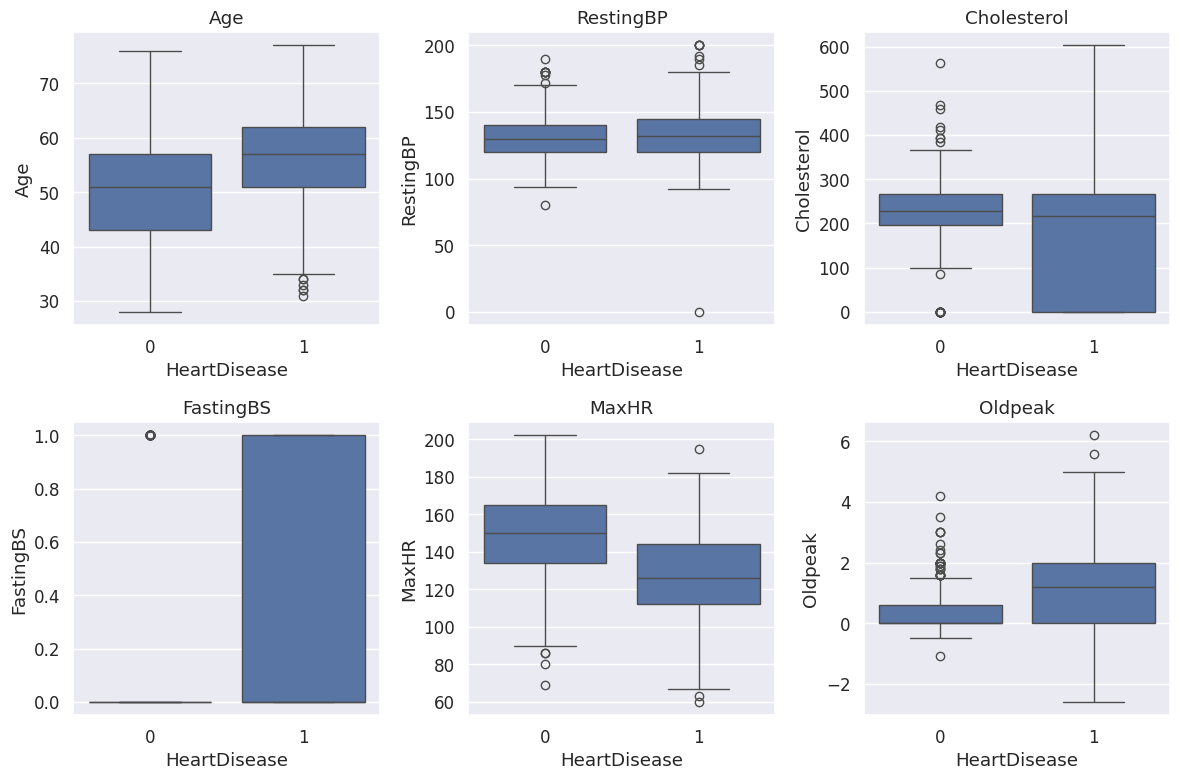

In [ ]:
plt.figure(figsize=(12,8))
for i, col in enumerate(numeric_cols,1):
    plt.subplot(2,3,i)
    sns.boxplot(x=df[terget_col],y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()



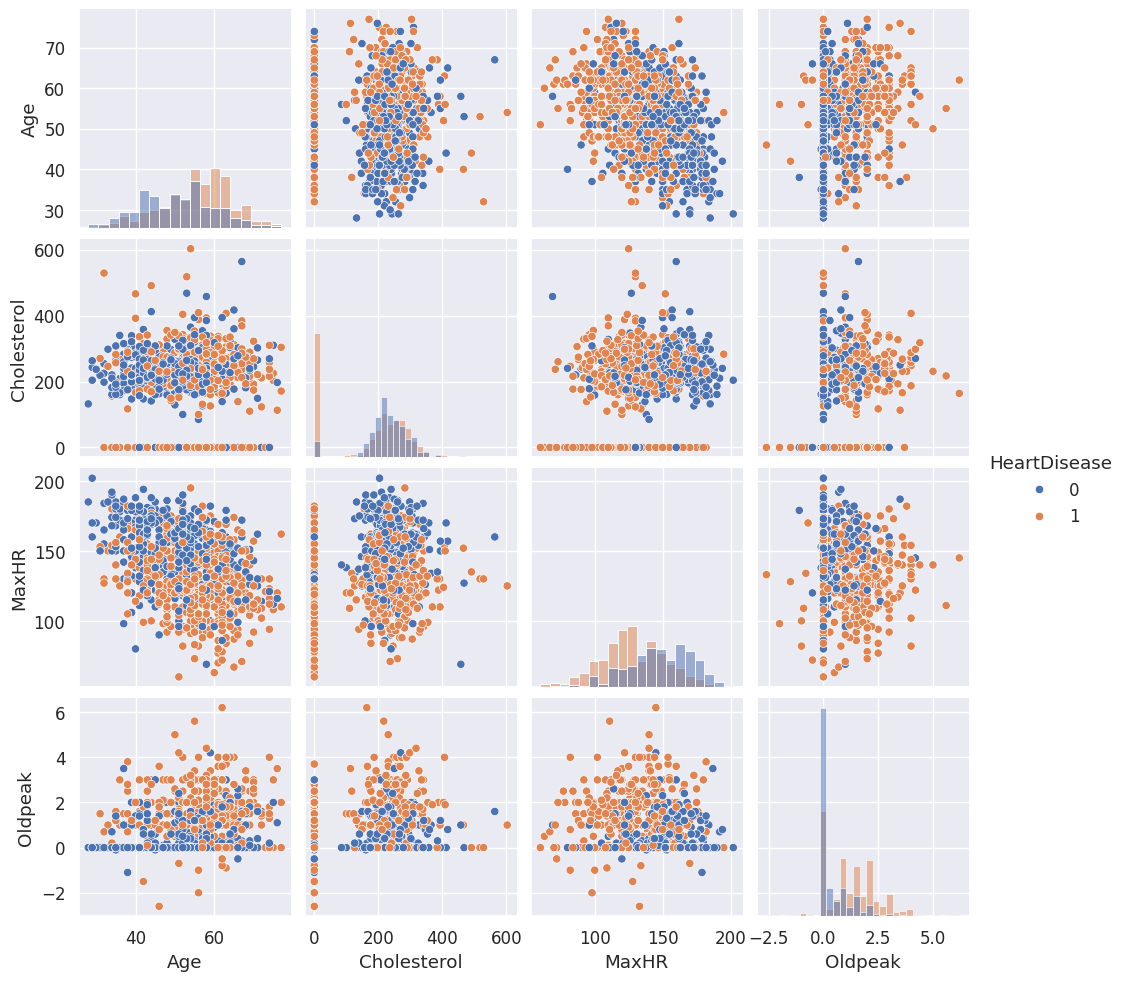

In [ ]:
sns.pairplot(df[['Age','Cholesterol','MaxHR','Oldpeak','HeartDisease']],hue="HeartDisease",diag_kind="hist")
plt.show()
#

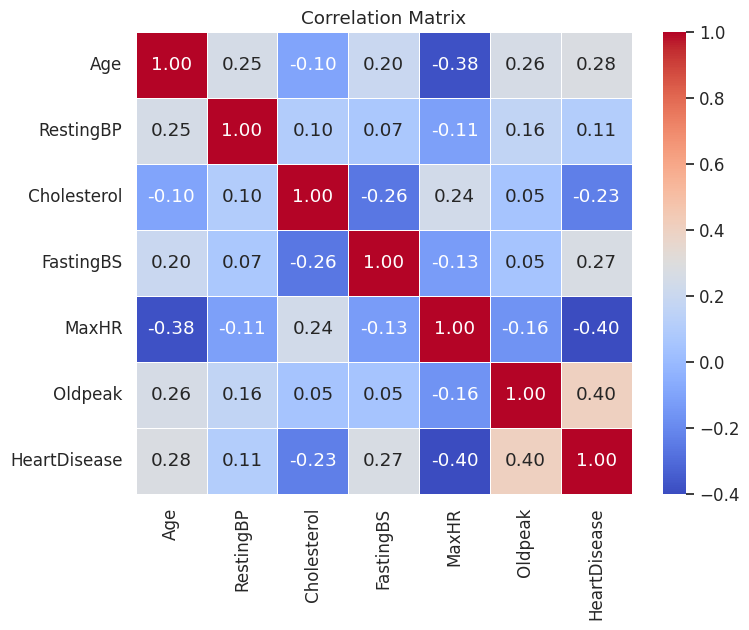

In [ ]:
corr_matrix= df[numeric_cols + [terget_col]].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm",fmt=".2f",linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
corr_matrix[terget_col].sort_values(ascending=False)

,HeartDisease
HeartDisease,1.000000
Oldpeak,0.403951
Age,0.282039
FastingBS,0.267291
RestingBP,0.107589
Cholesterol,-0.232741
MaxHR,-0.400421



Proportion of HeartDisease withinSex


HeartDisease,0,1
Sex,,
F,0.740933,0.259067
M,0.368276,0.631724


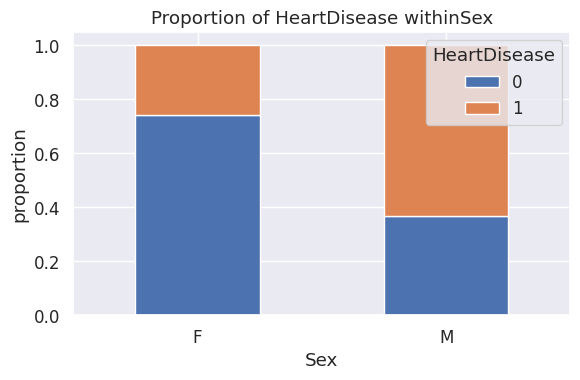


Proportion of HeartDisease withinChestPainType


HeartDisease,0,1
ChestPainType,,
ASY,0.209677,0.790323
ATA,0.861272,0.138728
NAP,0.645320,0.354680
TA,0.565217,0.434783


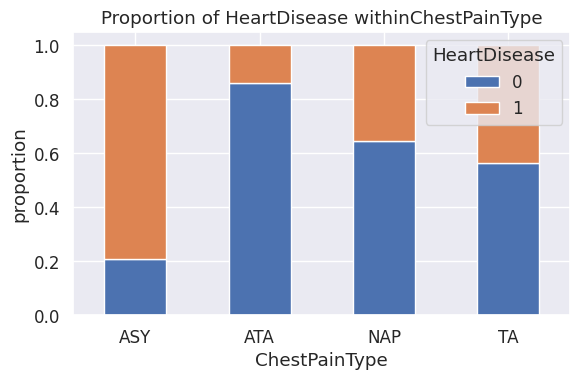


Proportion of HeartDisease withinRestingECG


HeartDisease,0,1
RestingECG,,
LVH,0.436170,0.563830
Normal,0.483696,0.516304
ST,0.342697,0.657303


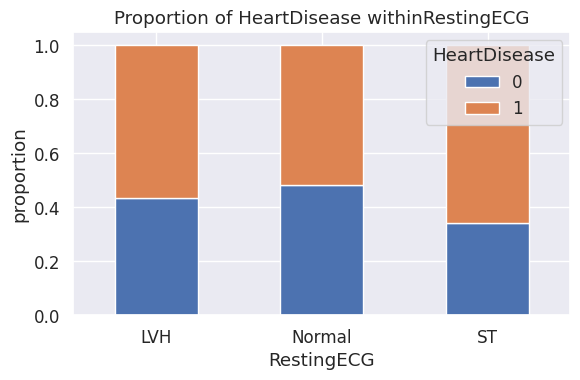


Proportion of HeartDisease withinExerciseAngina


HeartDisease,0,1
ExerciseAngina,,
N,0.648995,0.351005
Y,0.148248,0.851752


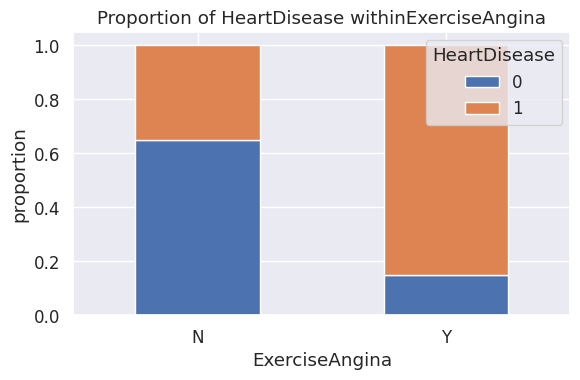


Proportion of HeartDisease withinST_Slope


HeartDisease,0,1
ST_Slope,,
Down,0.222222,0.777778
Flat,0.171739,0.828261
Up,0.802532,0.197468


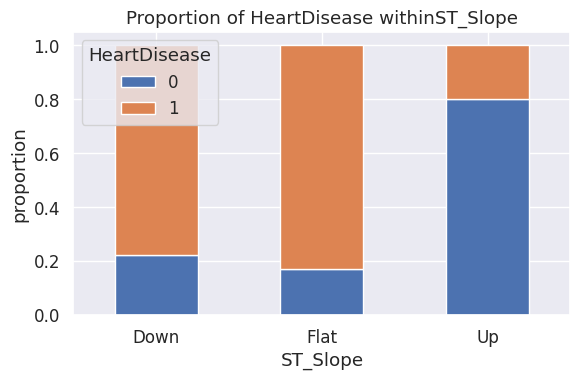

In [ ]:
for c in categorical_cols:
    ct = pd.crosstab(df[c],df[terget_col], normalize="index")
    print(f"\nProportion of HeartDisease within{c}")
    display(ct)

    ct.plot(kind="bar", stacked= True, figsize= (6,4))
    plt.title(f'Proportion of HeartDisease within{c}')
    plt.ylabel("proportion")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()